# Spam Email Analysis with Machine Learning

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

C:\Users\mayew\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\mayew\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\mayew\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
spam = pd.read_csv('data-set/spam.csv') # data set read

In [4]:
spam

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
spam.shape

(5572, 2)

In [6]:
spam.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
spam.groupby(spam['Category']).size()

Category
ham     4825
spam     747
dtype: int64

We have a total of 5572 data. There are %83 safe and %17 spam.

In [8]:
spam.Category = spam.Category.apply(lambda x: 1 if x == 'spam' else 0) 

We changed the spam values in the Category column with 1 and the raw values with 0.

In [9]:
spam.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
messages = spam.iloc[:,1] # Messages column

In [11]:
messages.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object

In [12]:
ifSpam = spam.iloc[:,0] # Spam column

In [13]:
ifSpam.head()

0    0
1    0
2    1
3    0
4    0
Name: Category, dtype: int64

In [14]:
messages_train, messages_test, ifSpam_train, ifSpam_test = train_test_split(messages, ifSpam, test_size=0.25)

We will use 75% of our dataset for training and 25% for testing 

In [15]:
cv = CountVectorizer()

With CountVectorizer, text is analyzed and word counts are made and these are converted into vectors.

In [17]:
features = cv.fit_transform(messages_train)

In [18]:
features_test = cv.transform(messages_test)

# Learning and Predicts 

In [19]:
knModel = KNeighborsClassifier(n_neighbors=1)

In [20]:
knModel.fit(features, ifSpam_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
knPredict = knModel.predict(features_test)

In [22]:
dtModel = tree.DecisionTreeClassifier() 

In [23]:
dtModel.fit(features, ifSpam_train)

DecisionTreeClassifier()

In [24]:
dtPredict = dtModel.predict(features_test)

In [25]:
svModel = svm.SVC()

In [26]:
svModel.fit(features,ifSpam_train)

SVC()

In [27]:
svPredict = svModel.predict(features_test)

In [28]:
rfModel = RandomForestClassifier() 

In [29]:
rfModel.fit(features, ifSpam_train) 

RandomForestClassifier()

In [30]:
rfPredict = rfModel.predict(features_test)

# Visualization

In [31]:
from sklearn.metrics import plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve

In [32]:
def visualization(model):
    predict = model.predict(features_test)
    plot_confusion_matrix(model,features_test,ifSpam_test)
    plot_precision_recall_curve(model,features_test,ifSpam_test)
    plot_roc_curve(model,features_test,ifSpam_test)

# Results

### K-Nearest Neighbors 

In [33]:
print("Number of mislabeled out of a total of %d test entries: %d" % (features_test.shape[0], 
                                                                      (ifSpam_test != knPredict).sum()))

Number of mislabeled out of a total of 1393 test entries: 68


In [34]:
successRate = 100.0 * f1_score(ifSpam_test, knPredict, average='micro')

In [35]:
print("The Success Rate was calculated as % : " + str(successRate) + " with the K-Nearest-Neighbors")

The Success Rate was calculated as % : 95.11844938980617 with the K-Nearest-Neighbors


C:\Users\mayew\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\mayew\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\mayew\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class meth

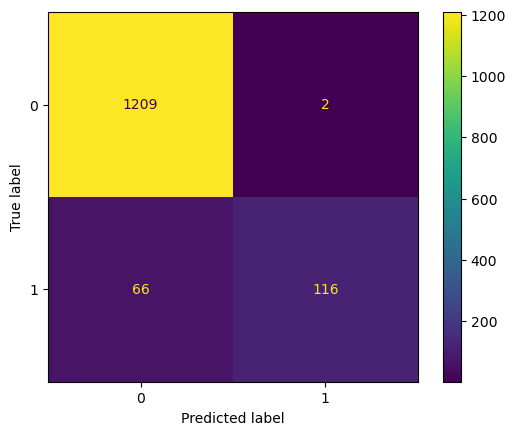

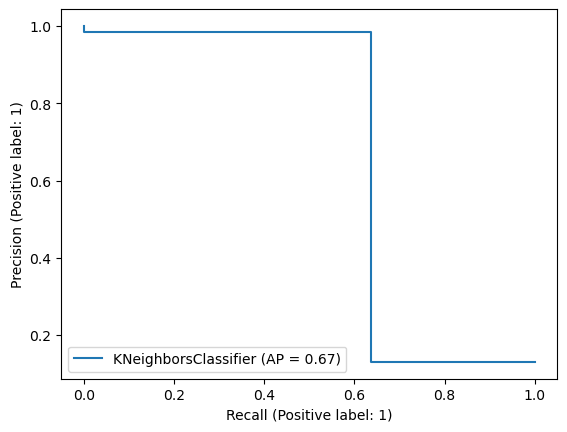

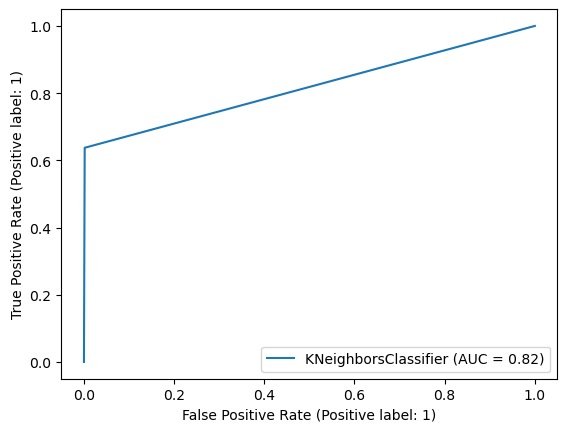

In [36]:
visualization(knModel)

### Random Forest

In [37]:
print("Number of mislabeled out of a total of %d test entries: %d" % (features_test.shape[0], 
                                                                      (ifSpam_test != rfPredict).sum()))

Number of mislabeled out of a total of 1393 test entries: 34


In [38]:
successRate = 100.0 * f1_score(ifSpam_test, rfPredict, average='micro')

In [39]:
print("The Success Rate was calculated as % : " + str(successRate) + " with Random Forest")

The Success Rate was calculated as % : 97.5592246949031 with Random Forest


C:\Users\mayew\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\mayew\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\mayew\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class meth

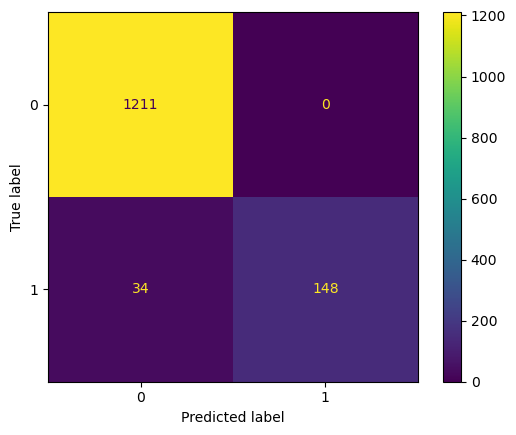

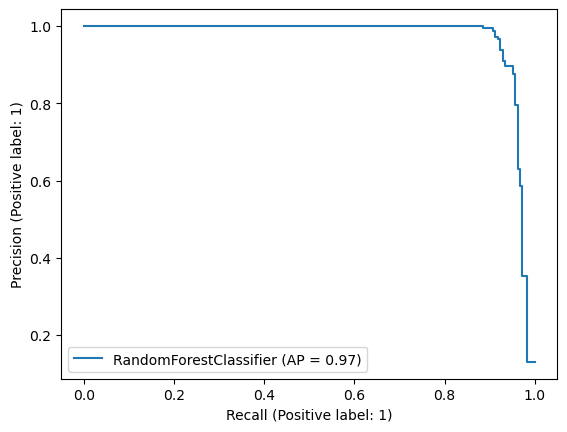

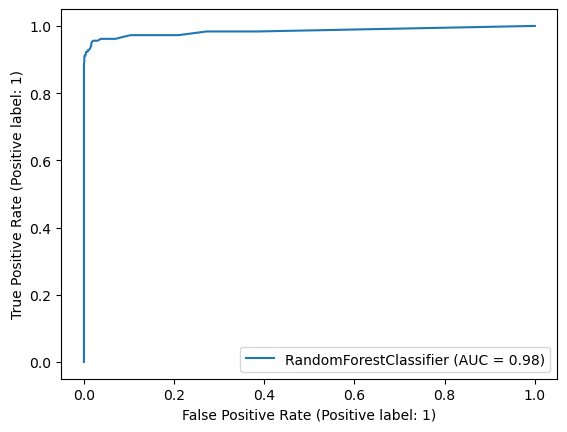

In [40]:
visualization(rfModel)

### Decision Tree

In [41]:
print("Number of mislabeled out of a total of %d test entries: %d" % (features_test.shape[0], 
                                                                      (ifSpam_test != dtPredict).sum()))

Number of mislabeled out of a total of 1393 test entries: 43


In [42]:
successRate = 100.0 * f1_score(ifSpam_test, dtPredict, average='micro')

In [43]:
print("The Success Rate was calculated as % : " + str(successRate) + " with Decision Tree")

The Success Rate was calculated as % : 96.91313711414213 with Decision Tree


C:\Users\mayew\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\mayew\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\mayew\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class meth

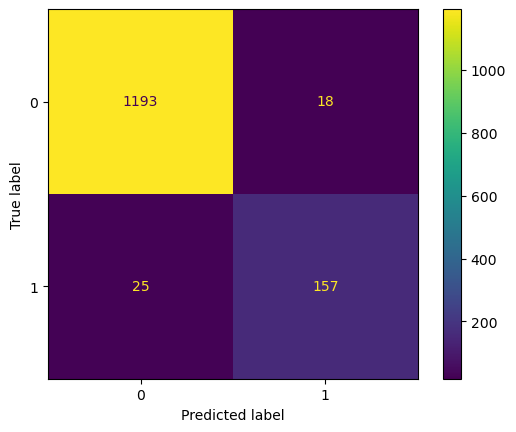

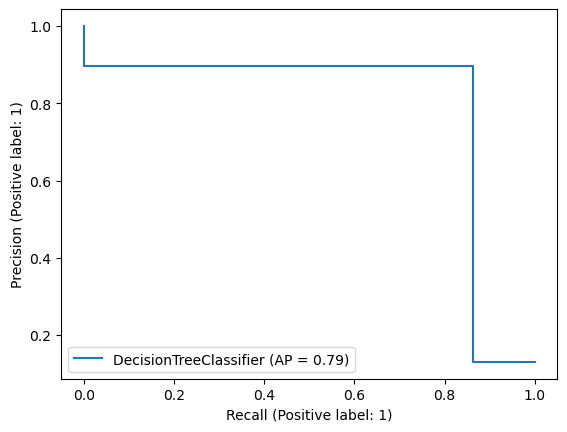

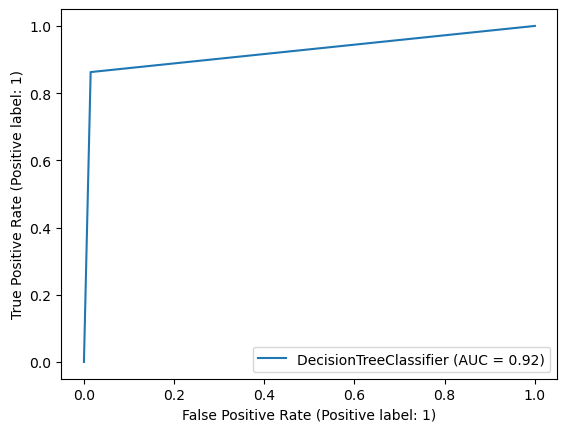

In [44]:
visualization(dtModel)

### Support Vector Machine

In [45]:
print("Number of mislabeled out of a total of %d test entries: %d" % (features_test.shape[0], 
                                                                      (ifSpam_test != svPredict).sum()))

Number of mislabeled out of a total of 1393 test entries: 32


In [46]:
successRate = 100.0 * f1_score(ifSpam_test, svPredict, average='micro')

In [47]:
print("The Success Rate was calculated as % : " + str(successRate) + " with Support Vector Machine")

The Success Rate was calculated as % : 97.70279971284997 with Support Vector Machine


C:\Users\mayew\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\mayew\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\mayew\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class meth

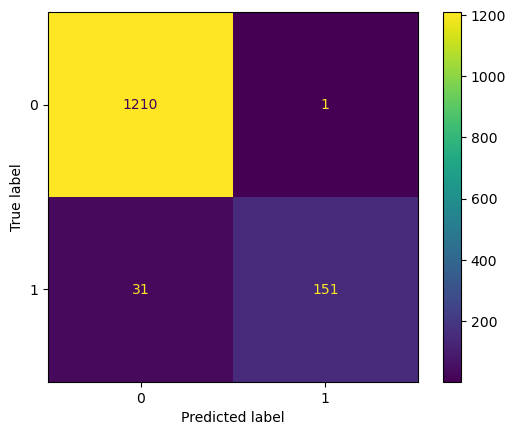

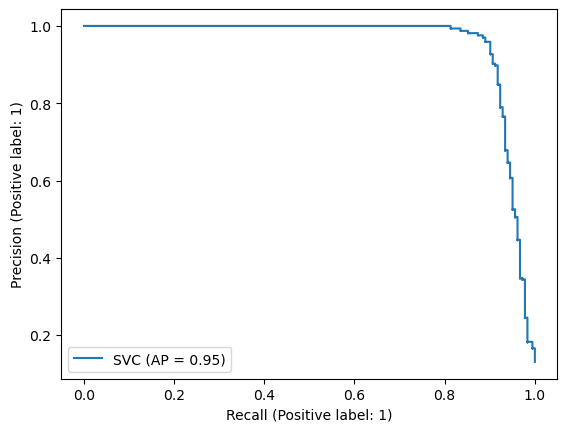

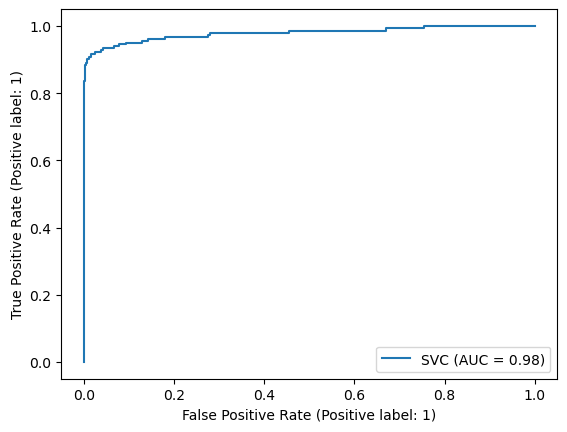

In [48]:
visualization(svModel)

In [51]:
import pickle

pkl_filename = "rfmodel.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rfModel, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
# Calculate the accuracy score and predict target values
#score = pickle_model.score(test_data, answer_data)
#print("Test score: {0:.2f} %".format(100 * score))
#Ypredict = pickle_model.predict(test_data)